# Domain count and size

In [1]:
import numpy as np
import pandas as pd
from glob import glob
from concurrent.futures import ProcessPoolExecutor, as_completed

import anndata

from scipy.stats import pearsonr, ranksums

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns

mpl.style.use('default')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica'


In [2]:
import hba_data
ctdict = hba_data.internal.celltype.CellType.majortype_palette()


In [3]:
leg = pd.Index(['L23_IT', 'L4_IT', 'L5_IT', 'L6_IT', 'L6_IT_Car3', 'L56_NP', 'L6_CT', 'L6b', 'L5_ET', 'Amy', 
                'Lamp5', 'Lamp5_LHX6', 'Sncg', 'Vip', 'Pvalb', 'Pvalb_ChC', 'Sst', 'CHD7', 
                'MSN_D1', 'MSN_D2', 'Foxp2', 'SubCtx', 
                'ASC', 'ODC', 'OPC', 'MGC', 'PC', 'EC', 'VLMC'
               ])
legname = pd.Index(['L2/3-IT', 'L4-IT', 'L5-IT', 'L6-IT', 'L6-IT-Car3', 'L5/6-NP', 'L6-CT', 'L6b', 'L5-ET', 'Amy-Exc', 
                    'Lamp5', 'Lamp5-Lhx6', 'Sncg', 'Vip', 'Pvalb', 'Pvalb-ChC', 'Sst', 'Chd7', 
                    'MSN-D1', 'MSN-D2', 'Foxp2', 'SubCtx-Cplx', 
                    'ASC', 'ODC', 'OPC', 'MGC', 'PC', 'EC', 'VLMC'
                   ])
print(len(leg))


29


In [4]:
indir = '/data/hba/domain_majortype/'
outdir = '/home/jzhou_salk_edu/sky_workdir/hba/domain_majortype/'
res = 25000


In [5]:
sc_border = anndata.read_h5ad(f'{outdir}cell_117540_boundary.h5ad')
sc_border

AnnData object with n_obs × n_vars = 117540 × 102255
    obs: 'PassFilter', 'mCCCFrac', 'mCGFrac', 'mCGFracAdj', 'mCHFrac', 'mCHFracAdj', 'FinalmCReads', 'pool', 'Plate', 'plate_relative_read', 'Donor', 'Region', 'tech', 'donor-tech', 'SubType', 'MajorType', 'forloop_SubType', 'forloop_MajorType', 'forloop_Region', 'CisLongContact', 'TransContact', 'Cis/Trans', 'bound_count', 'tsne_0', 'tsne_1'
    var: 'chrom', 'start', 'end', 'n_cell'
    obsm: 'X_pca', 'X_pca_harmony', 'X_tsne', 'bound_lsi_all', 'bound_u25_tsne', 'bound_u25hm', 'bound_u25hm_tsne'

In [6]:
def compute_domain_size(i):
    global res, sc_border
    tmp = sc_border.raw.X[i]
    tmp = np.repeat(tmp.indices, tmp.data).reshape((-1, 2))
    return (tmp[:, 1] - tmp[:, 0]).sum() * res


In [7]:
metadata = pd.read_hdf(f'{outdir}cell_117540_meta.hdf')
metadata

,PassFilter,mCCCFrac,mCGFrac,mCGFracAdj,mCHFrac,mCHFracAdj,FinalmCReads,pool,Plate,plate_relative_read,...,forloop_SubType,forloop_MajorType,forloop_Region,CisLongContact,TransContact,Cis/Trans,domain_coverage,domain_count,boundary_count,domain_size
HBA_220218_H1930002_CX47_BNST_3C_1_P1-1-M14-A1,True,0.006068,0.773828,0.772447,0.012215,0.006185,2116936,hba_m3c16_h1930002_BNST,HBA_220218_H1930002_CX47_BNST_3C_1_P1,0.971324,...,ASC_Bergemann_0,NaN,NaN,278749.0,157264.0,1.772491,2801350000,4410.0,4857,635226.757370
HBA_220218_H1930002_CX47_BNST_3C_1_P1-1-M14-A13,True,0.004877,0.769910,0.768782,0.011441,0.006596,2250650,hba_m3c16_h1930002_BNST,HBA_220218_H1930002_CX47_BNST_3C_1_P1,1.032676,...,NaN,NaN,NaN,335489.0,163603.0,2.050629,2807375000,4752.0,5265,590777.567340
HBA_220218_H1930002_CX47_BNST_3C_1_P1-1-M14-A14,True,0.005228,0.745918,0.744583,0.006356,0.001134,2655450,hba_m3c16_h1930002_BNST,HBA_220218_H1930002_CX47_BNST_3C_1_P1,1.218413,...,OPC_0,OPC,NaN,353846.0,234196.0,1.510897,2797275000,4800.0,5313,582765.625000
HBA_220218_H1930002_CX47_BNST_3C_1_P1-1-M14-A2,True,0.008819,0.750491,0.748271,0.013308,0.004529,2365072,hba_m3c16_h1930002_BNST,HBA_220218_H1930002_CX47_BNST_3C_1_P1,1.085177,...,NaN,NaN,NaN,324190.0,189126.0,1.714148,2810575000,4469.0,4889,628904.676661
HBA_220218_H1930002_CX47_BNST_3C_1_P1-1-M14-B1,True,0.005061,0.761122,0.759906,0.016676,0.011674,779910,hba_m3c16_h1930002_BNST,HBA_220218_H1930002_CX47_BNST_3C_1_P1,0.357850,...,ASC_2,NaN,NaN,93768.0,57444.0,1.632338,2787325000,3041.0,3297,916581.716541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HBA_211117_H1930002_CX47_FI_3C_1_P8-6-J7-O24,True,0.010842,0.798236,0.796024,0.054124,0.043756,1948656,hba_m3c11_h1930002_FI,HBA_211117_H1930002_CX47_FI_3C_1_P8,0.984126,...,Sncg_1,Sncg,NaN,246773.0,133468.0,1.848930,2823125000,4690.0,5181,601945.628998
HBA_211117_H1930002_CX47_FI_3C_1_P8-6-J7-P11,True,0.012916,0.768051,0.765016,0.062617,0.050352,2450246,hba_m3c11_h1930002_FI,HBA_211117_H1930002_CX47_FI_3C_1_P8,1.237444,...,L6_IT_Car3_1,L6_IT_Car3,NaN,356046.0,131529.0,2.706977,2849325000,5063.0,5683,562774.047008
HBA_211117_H1930002_CX47_FI_3C_1_P8-6-J7-P12,True,0.006666,0.801151,0.799817,0.026621,0.020089,2906150,hba_m3c11_h1930002_FI,HBA_211117_H1930002_CX47_FI_3C_1_P8,1.467688,...,Vip_4,Vip,NaN,352862.0,219220.0,1.609625,2846425000,4978.0,5499,571800.924066
HBA_211117_H1930002_CX47_FI_3C_1_P8-6-J7-P23,True,0.008189,0.792329,0.790614,0.036346,0.028389,2293534,hba_m3c11_h1930002_FI,HBA_211117_H1930002_CX47_FI_3C_1_P8,1.158300,...,Sncg_0,Sncg,NaN,268935.0,194847.0,1.380237,2854400000,4642.0,5151,614907.367514


In [8]:
ncpu = 20
domain_size, cell_list = [], []
with ProcessPoolExecutor(ncpu) as exe:
    future_dict = {}
    for i,cell in enumerate(metadata.index):
        future = exe.submit(compute_domain_size, i=i)
        future_dict[future] = cell

    for future in as_completed(future_dict):
        cell = future_dict[future]
        # print(f'{cell} finished.')
        domain_size.append(future.result())
        cell_list.append(cell)


In [9]:
domain_size = pd.Series(domain_size, index=cell_list)
metadata['domain_coverage'] = domain_size.copy()
metadata.loc[sc_border.obs.index, 'domain_count'] = sc_border.raw.X.sum(axis=1).A1 / 2


In [10]:
# sc_border.X.data = np.ones(sc_border.X.data.shape)
metadata.loc[sc_border.obs.index, 'boundary_count'] = sc_border.raw.X.getnnz(axis=1)


In [11]:
metadata['domain_size'] = metadata['domain_coverage'] / metadata['domain_count']

In [12]:
legnonn = ['ASC', 'ODC', 'OPC', 'MGC', 'PC', 'EC', 'VLMC']
print(np.median(metadata.loc[~metadata['MajorType'].isin(legnonn), 'domain_count']), 
      np.median(metadata.loc[metadata['MajorType'].isin(legnonn), 'domain_count']))
      

4815.0 4309.0


In [13]:
ranksums(metadata.loc[~metadata['MajorType'].isin(legnonn), 'domain_count'], 
         metadata.loc[metadata['MajorType'].isin(legnonn), 'domain_count'])


RanksumsResult(statistic=193.64366840482205, pvalue=0.0)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


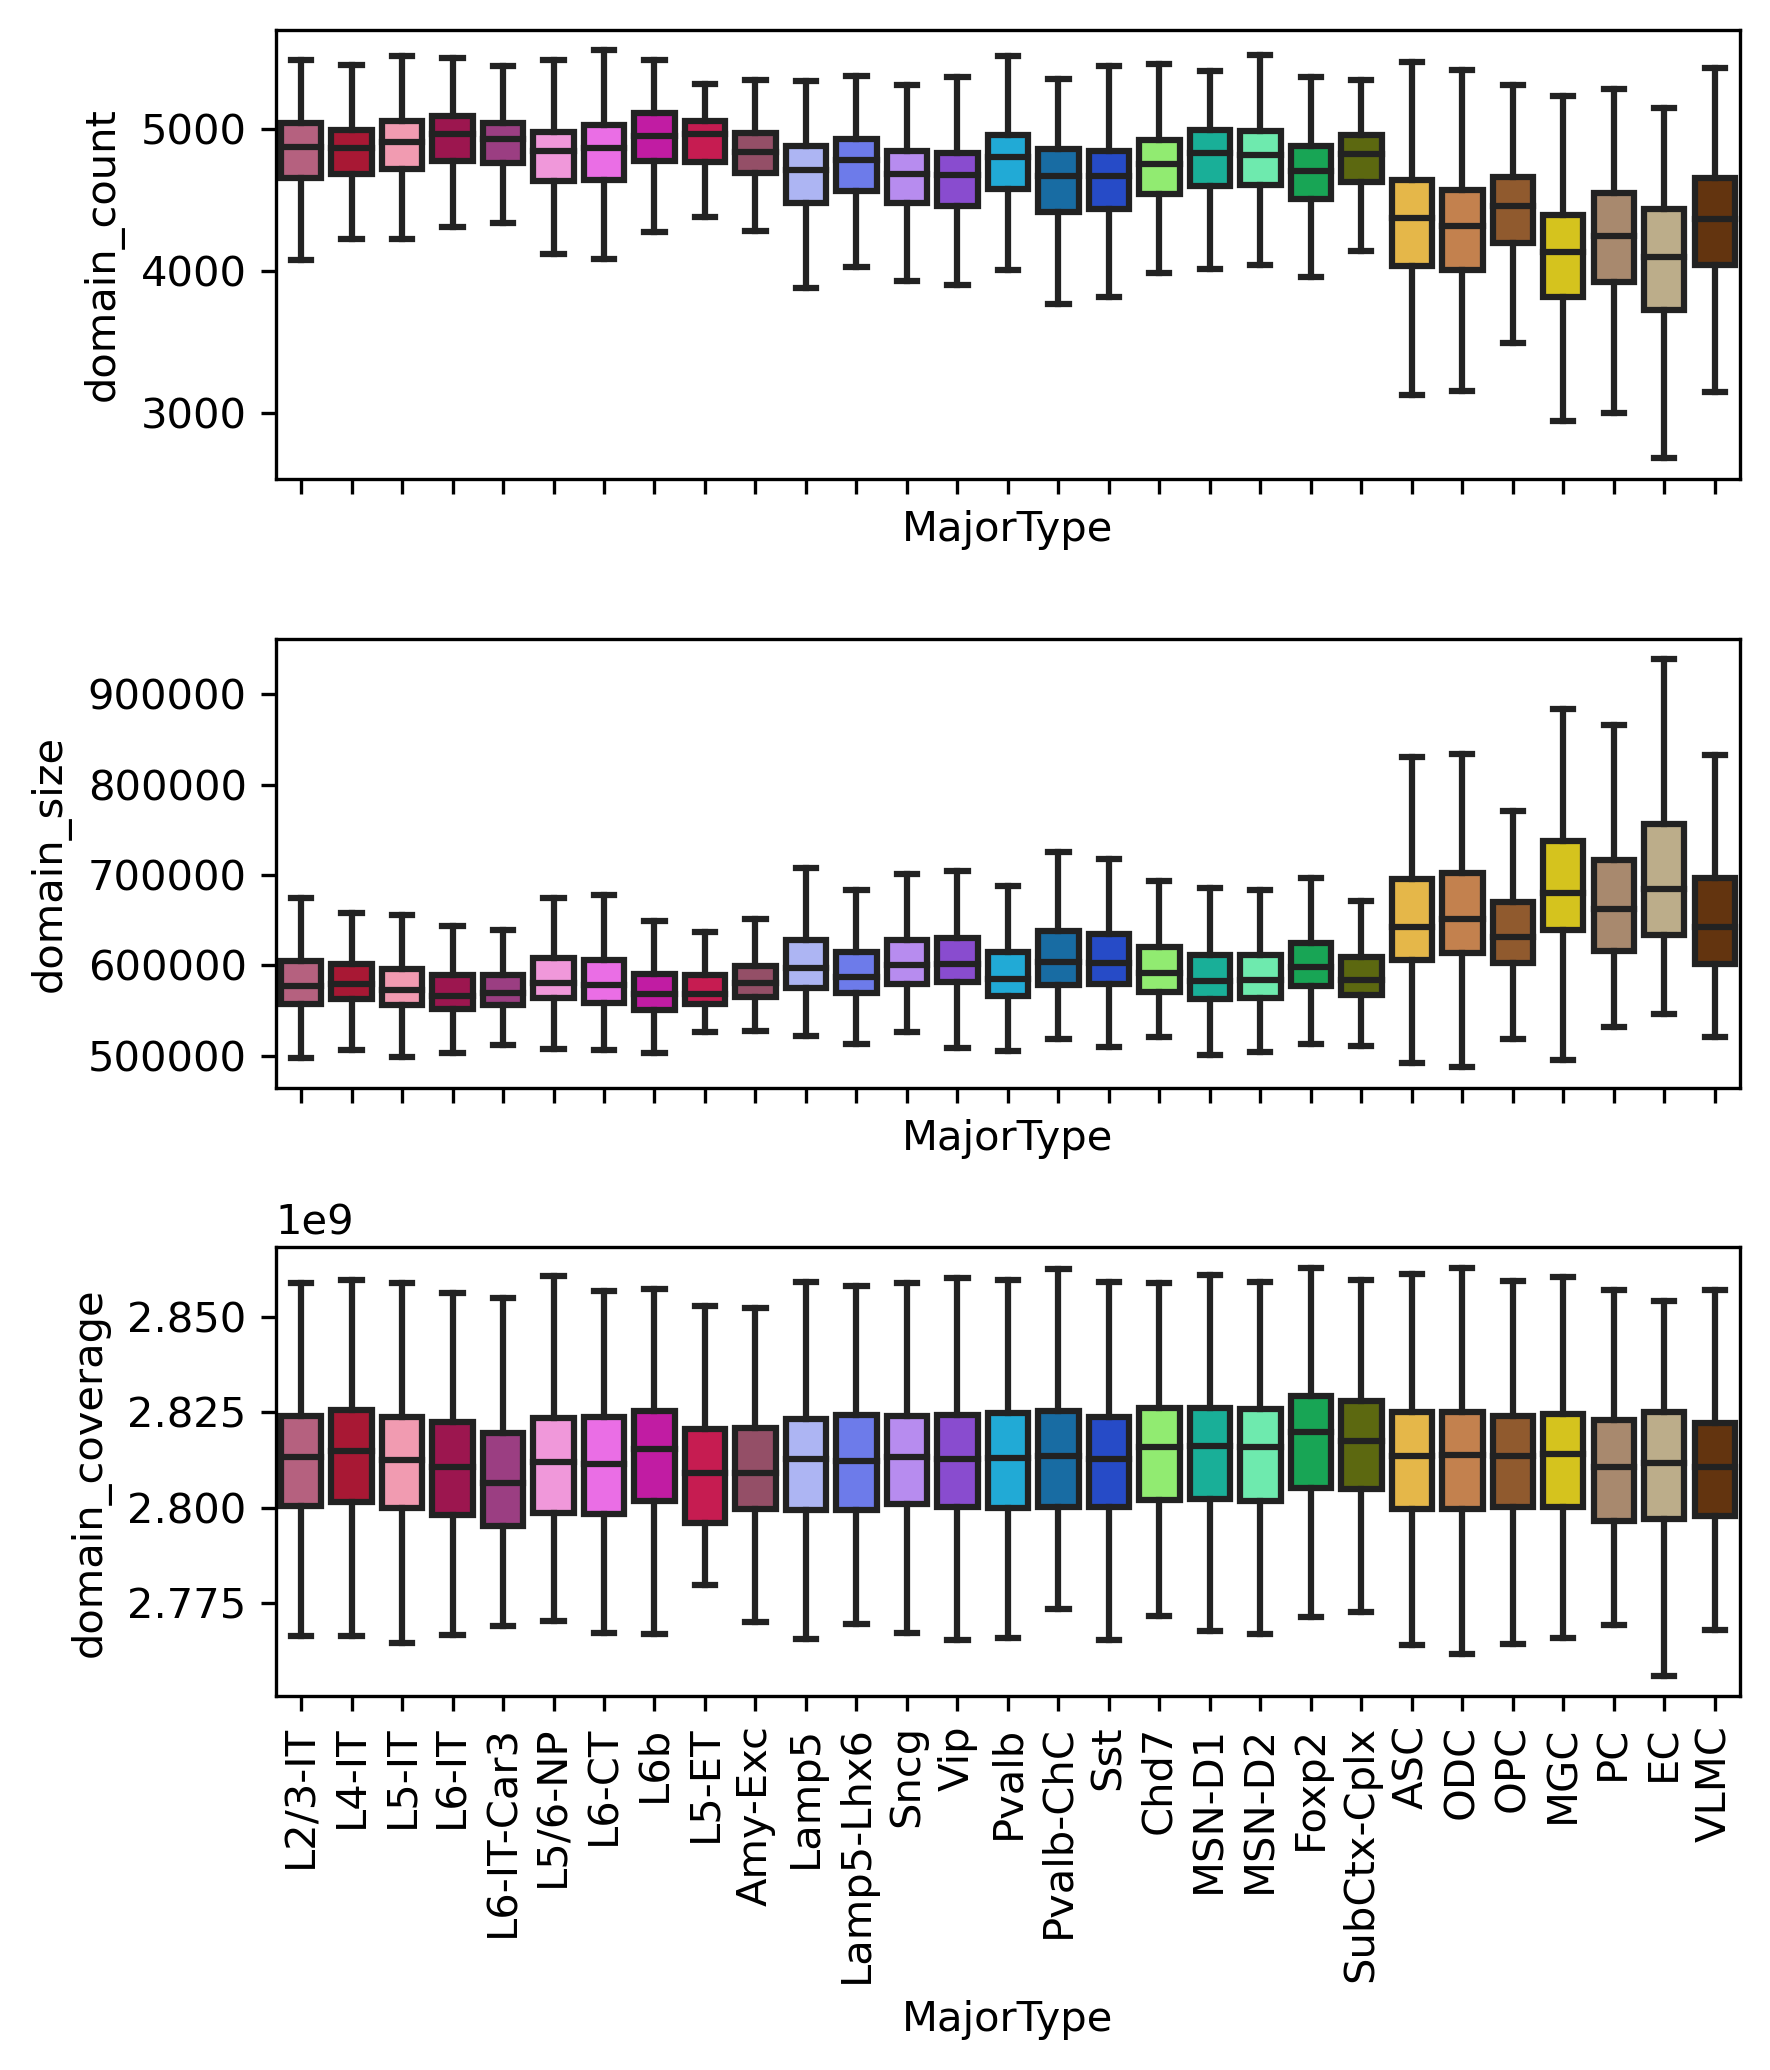

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(6,7), sharex='all', dpi=300)
ax = axes[0]
sns.boxplot(data=metadata, x='MajorType', y='domain_count', order=leg, showfliers=False, palette=ctdict, ax=ax)
ax = axes[1]
sns.boxplot(data=metadata, x='MajorType', y='domain_size', order=leg, showfliers=False, palette=ctdict, ax=ax)
ax = axes[2]
sns.boxplot(data=metadata, x='MajorType', y='domain_coverage', order=leg, showfliers=False, palette=ctdict, ax=ax)
ax.set_xticklabels(legname, rotation=90)
plt.tight_layout()
# plt.savefig(f'cell_{sc_border.shape[0]}_majortype_domain_boxplot.pdf', transparent=True, dpi=300)


In [15]:
adata = anndata.read_h5ad('/home/jzhou_salk_edu/sky_workdir/hba/rna_majortype/cell_29000_rna.h5ad')
adata

AnnData object with n_obs × n_vars = 29000 × 27294
    obs: 'Class', 'Supercluster', 'Clusters', 'Age', 'Donor', 'Sex', 'Tissue', 'MajorType', 'Prob', 'TotalUMI', 'tsne_0', 'tsne_1'
    var: 'ncell', 'mean', 'std', 'gene_name', 'chrom', 'start', 'end'
    uns: 'log1p'
    obsm: 'X_pca', 'X_tsne', 'pca_all', 'u50_tsne'

In [16]:
tmp = adata.obs.groupby('MajorType')['TotalUMI']
data = pd.DataFrame([tmp.mean(), tmp.std() / np.sqrt(tmp.count())], 
                    index=['TotalUMI_mean', 'TotalUMI_sem']).T
tmp = metadata.groupby('MajorType')['domain_count']
data['domain_count_mean'] = tmp.mean()
data['domain_count_sem'] = tmp.std() / np.sqrt(tmp.count())
tmp = metadata.groupby('MajorType')['domain_size']
data['domain_size_mean'] = tmp.mean()
data['domain_size_sem'] = tmp.std() / np.sqrt(tmp.count())
data['color'] = data.index.map(ctdict)


In [17]:
print(pearsonr(data['TotalUMI_mean'], data['domain_count_mean']))
print(pearsonr(data['TotalUMI_mean'], data['domain_size_mean']))


(0.8848877901822902, 1.8740488558868936e-10)
(-0.8639479580893032, 1.5727790131258659e-09)


Text(0, 0.5, 'Average Domain Size')

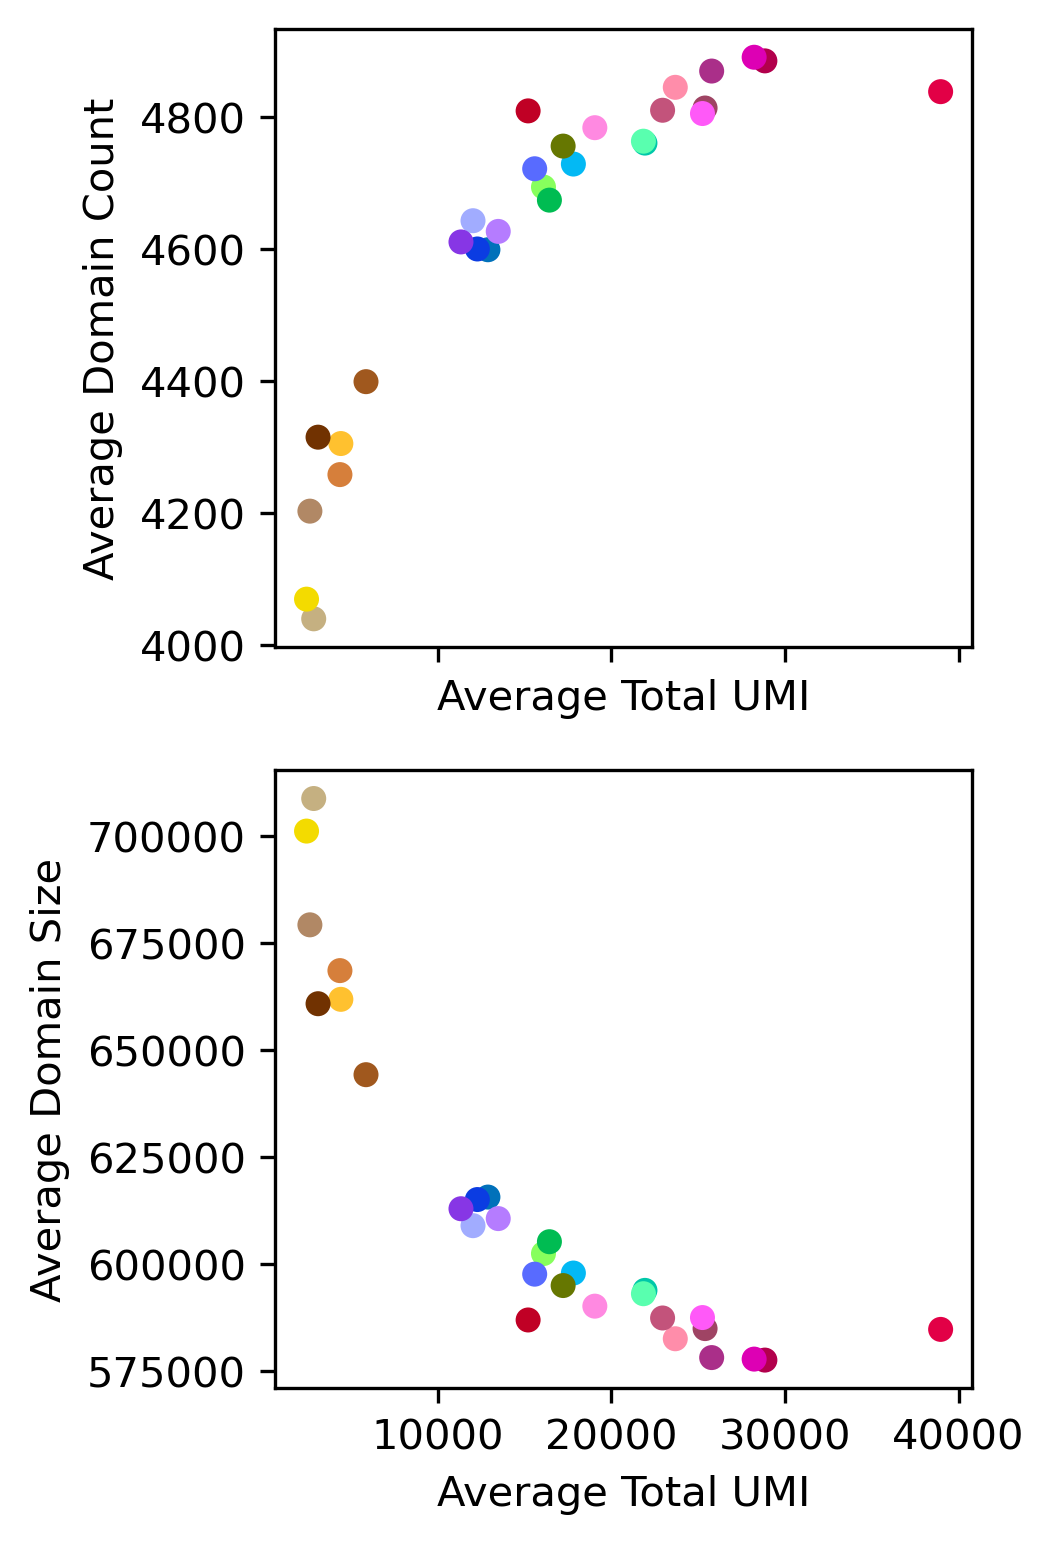

In [18]:
from scipy.stats import pearsonr
fig, axes = plt.subplots(2, 1, figsize=(3,6), dpi=300, sharex='all')
ax = axes[0]
ax.scatter(data['TotalUMI_mean'], data['domain_count_mean'], c=data['color'], edgecolor='none')
# ax.errorbar(x=data['TotalUMI_mean'], y=data['domain_count_mean'], 
#             xerr=data['TotalUMI_sem'], yerr=data['domain_count_sem'], 
#             fmt='none', ecolor='k')
ax.set_xlabel('Average Total UMI')
ax.set_ylabel('Average Domain Count')

ax = axes[1]
ax.scatter(data['TotalUMI_mean'], data['domain_size_mean'], c=data['color'], edgecolor='none')
# ax.errorbar(x=data['TotalUMI_mean'], y=data['domain_size_mean'], 
#             xerr=data['TotalUMI_sem'], yerr=data['domain_size_sem'], 
#             fmt='none', ecolor='k')
ax.set_xlabel('Average Total UMI')
ax.set_ylabel('Average Domain Size')

# plt.savefig('UMIvsDomain.pdf', transparent=True)


In [19]:
decay = pd.concat([pd.read_hdf(xx, key='data') for xx in glob(f'{outdir}../decay/cell_*_decay.hdf5')], axis=0)
decay = decay.loc[decay.index & metadata.index]
# metadata['short'] = decay.loc[:, (decay.columns > 50) & (decay.columns < 77)].sum(axis=1)
metadata['short'] = decay.loc[:, (decay.columns < 87)].sum(axis=1)


In [20]:
metadata['Neuron'] = metadata['MajorType'].isin(leg[:22])
metadata['Neuron'].value_counts()

False    67597
True     49943
Name: Neuron, dtype: int64

In [21]:
print(np.percentile(metadata.loc[metadata['Neuron'], 'short'], 5), np.percentile(metadata.loc[~metadata['Neuron'], 'short'], 5))
print(np.percentile(metadata.loc[metadata['Neuron'], 'short'], 95), np.percentile(metadata.loc[~metadata['Neuron'], 'short'], 95))

100445.1 69650.8
299780.8999999999 223265.99999999997


In [22]:
dsmeta = []
for i in range(100):
    ll = 100000 + 1000 * i
    rr = 100000 + 1000 * (i+1)
    data = metadata[(metadata['short']>=ll) & (metadata['short']<rr)]
    # n = data.groupby('MajorType')['short'].count().min()
    n = 1
    dsmeta.append(data.groupby('MajorType').sample(n=n))
    

In [23]:
dsmeta = pd.concat(dsmeta, axis=0)

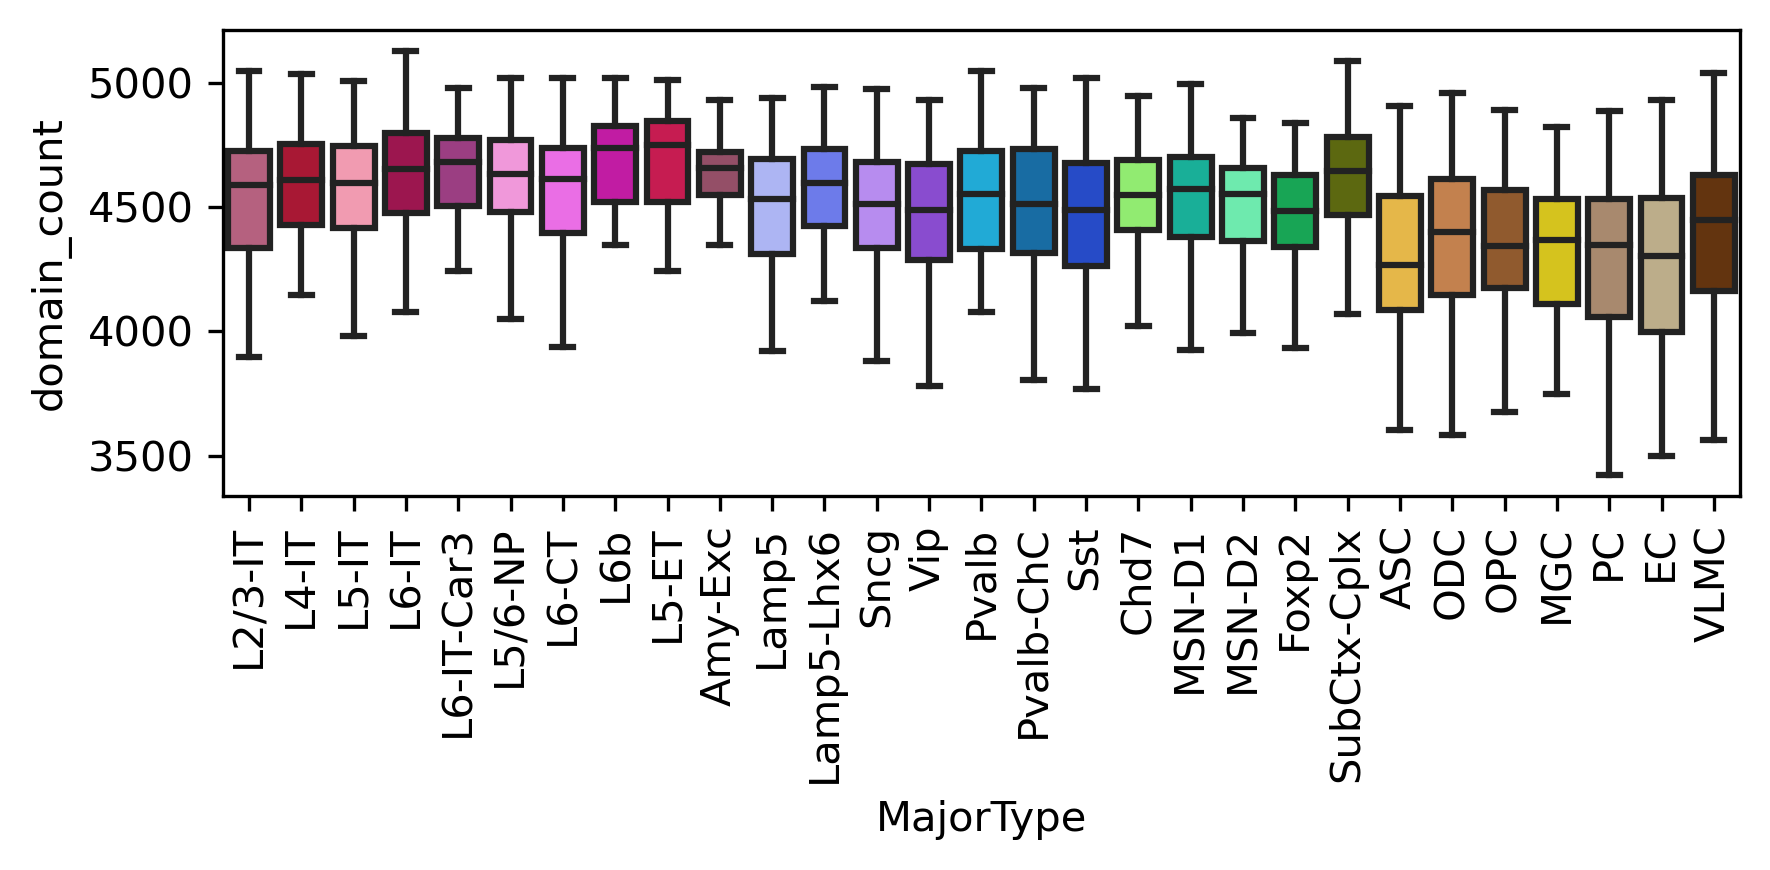

In [24]:
fig, ax = plt.subplots(figsize=(6,3), sharex='all', dpi=300)
sns.boxplot(data=dsmeta, x='MajorType', y='domain_count', order=leg, showfliers=False, palette=ctdict, ax=ax)
ax.set_xticklabels(legname, rotation=90)
plt.tight_layout()


<AxesSubplot:xlabel='short', ylabel='Count'>

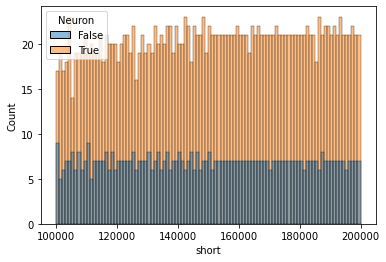

In [25]:
sns.histplot(data=dsmeta, x='short', hue='Neuron', bins=100)

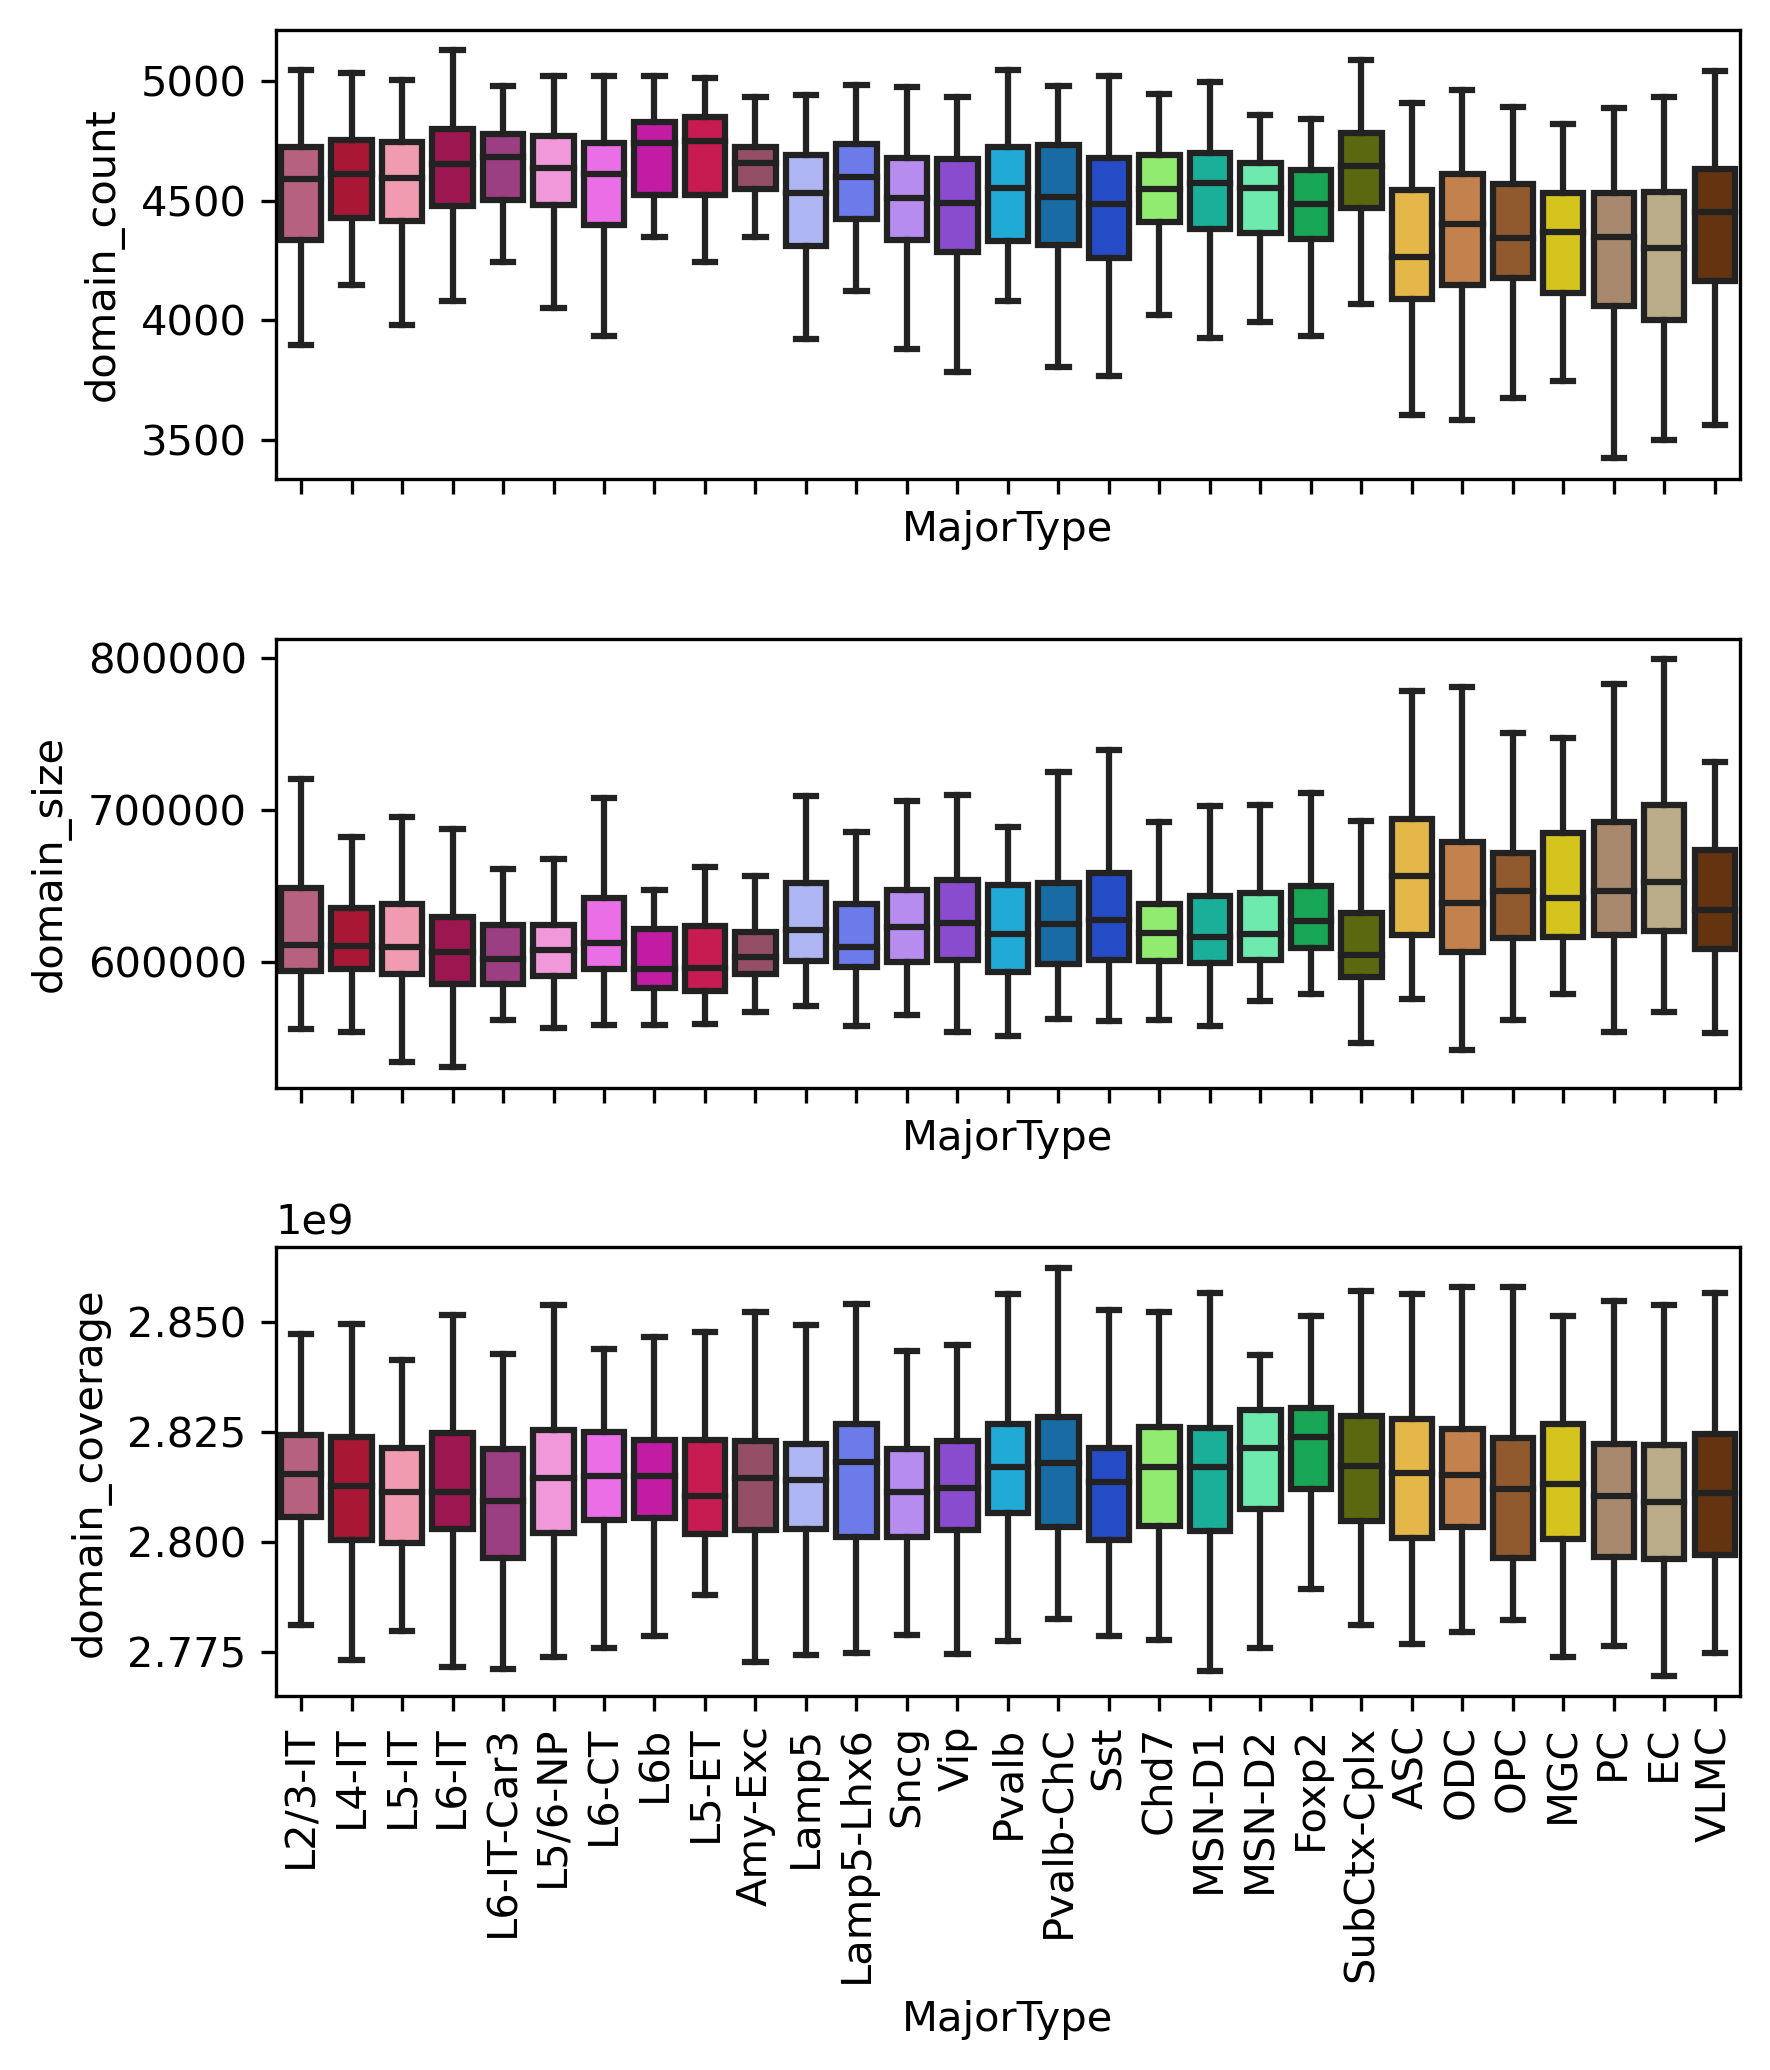

In [26]:
fig, axes = plt.subplots(3, 1, figsize=(6,7), sharex='all', dpi=300)
ax = axes[0]
sns.boxplot(data=dsmeta, x='MajorType', y='domain_count', order=leg, showfliers=False, palette=ctdict, ax=ax)
ax = axes[1]
sns.boxplot(data=dsmeta, x='MajorType', y='domain_size', order=leg, showfliers=False, palette=ctdict, ax=ax)
ax = axes[2]
sns.boxplot(data=dsmeta, x='MajorType', y='domain_coverage', order=leg, showfliers=False, palette=ctdict, ax=ax)
ax.set_xticklabels(legname, rotation=90)
plt.tight_layout()
# plt.savefig(f'cell_{dsmeta.shape[0]}_dowmsample_majortype_domain_boxplot.pdf', transparent=True, dpi=300)


In [27]:
ranksums(dsmeta.loc[dsmeta['Neuron'], 'domain_count'], dsmeta.loc[~dsmeta['Neuron'], 'domain_count'])

RanksumsResult(statistic=16.42898214725163, pvalue=1.1863351350444807e-60)

In [31]:
tmp = adata.obs.groupby('MajorType')['TotalUMI']
data = pd.DataFrame([tmp.mean(), tmp.std() / np.sqrt(tmp.count())], 
                    index=['TotalUMI_mean', 'TotalUMI_sem']).T
tmp = dsmeta.groupby('MajorType')['domain_count']
data['domain_count_mean'] = tmp.mean()
data['domain_count_sem'] = tmp.std() / np.sqrt(tmp.count())
tmp = dsmeta.groupby('MajorType')['domain_size']
data['domain_size_mean'] = tmp.mean()
data['domain_size_sem'] = tmp.std() / np.sqrt(tmp.count())
data['color'] = data.index.map(ctdict)


In [32]:
print(pearsonr(data['TotalUMI_mean'], data['domain_count_mean']))
print(pearsonr(data['TotalUMI_mean'], data['domain_size_mean']))


(0.8872834649340685, 1.4316831184652255e-10)
(-0.8711131318194102, 7.919297278100225e-10)


Text(0, 0.5, 'Average Domain Size')

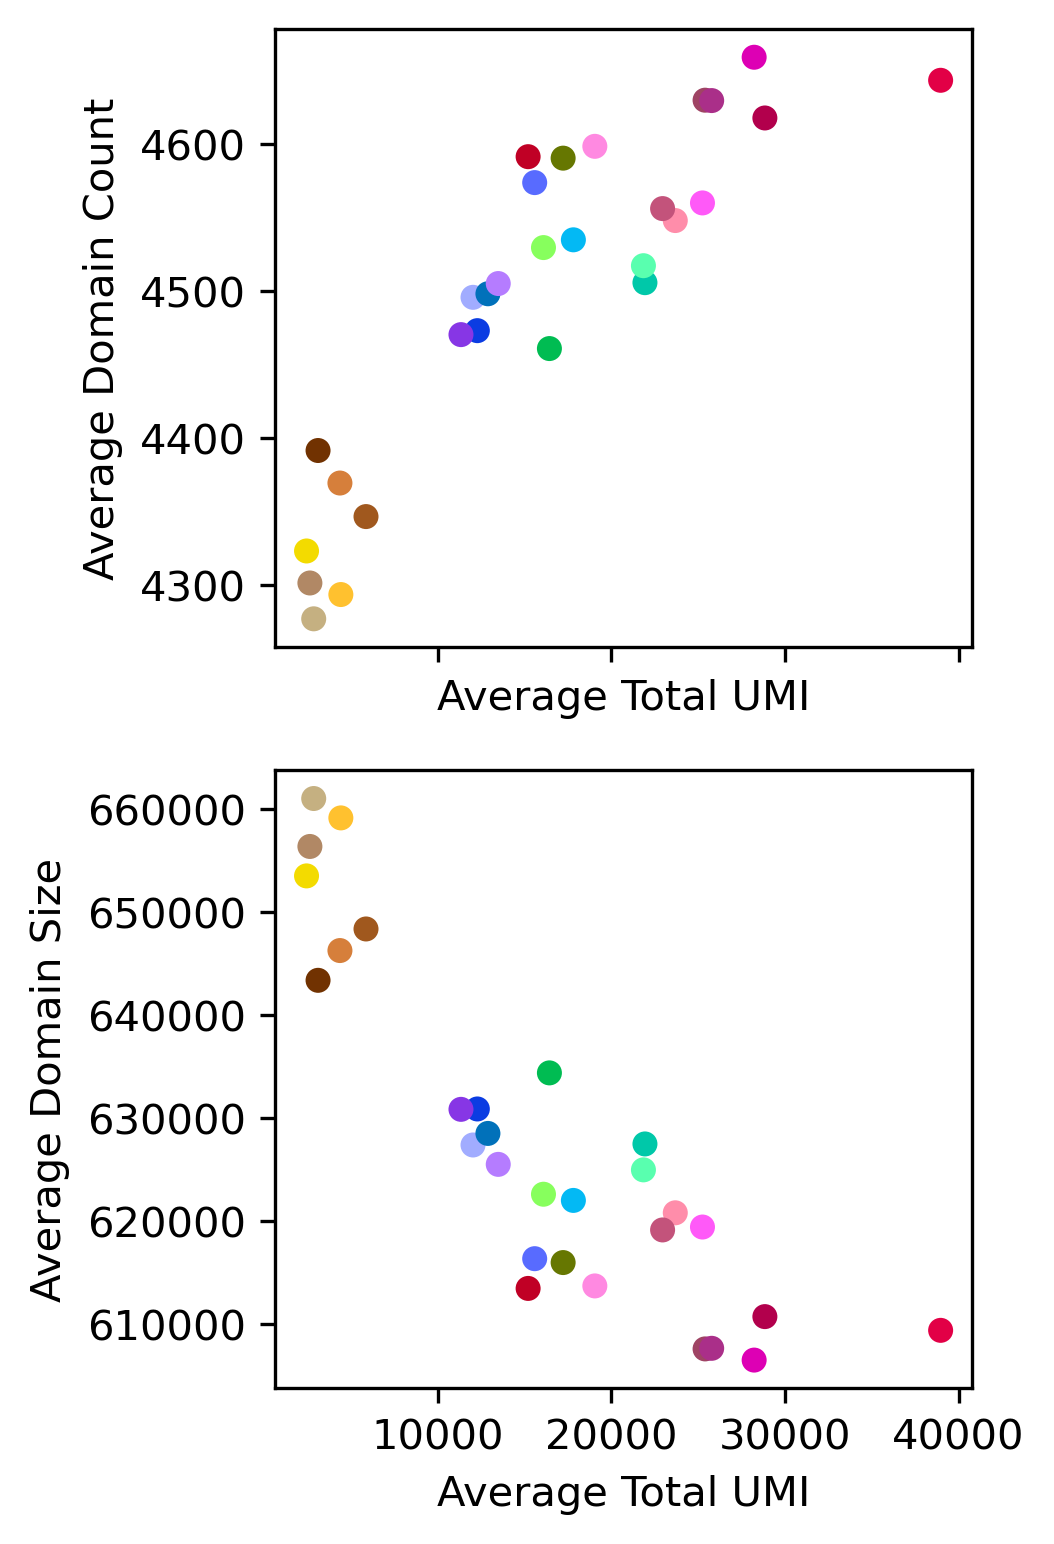

In [33]:
from scipy.stats import pearsonr
fig, axes = plt.subplots(2, 1, figsize=(3,6), dpi=300, sharex='all')
ax = axes[0]
ax.scatter(data['TotalUMI_mean'], data['domain_count_mean'], c=data['color'], edgecolor='none')
# ax.errorbar(x=data['TotalUMI_mean'], y=data['domain_count_mean'], 
#             xerr=data['TotalUMI_sem'], yerr=data['domain_count_sem'], 
#             fmt='none', ecolor='k')
ax.set_xlabel('Average Total UMI')
ax.set_ylabel('Average Domain Count')

ax = axes[1]
ax.scatter(data['TotalUMI_mean'], data['domain_size_mean'], c=data['color'], edgecolor='none')
# ax.errorbar(x=data['TotalUMI_mean'], y=data['domain_size_mean'], 
#             xerr=data['TotalUMI_sem'], yerr=data['domain_size_sem'], 
#             fmt='none', ecolor='k')
ax.set_xlabel('Average Total UMI')
ax.set_ylabel('Average Domain Size')

# plt.savefig('UMIvsDomain.pdf', transparent=True)
